In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
data=pd.read_csv("50_Startups.csv")

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
X=data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y=data['Profit']

In [6]:
print("X : ",X.shape)
print("y : ",y.shape)

X :  (50, 4)
y :  (50,)


# Encoding 

In [7]:
encoder=LabelEncoder()
X["State"]=encoder.fit_transform(X["State"])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [9]:
ohe=OneHotEncoder(categorical_features=[-1])
X=ohe.fit_transform(X).toarray()

/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
X=X[:,1:]

In [11]:
X.shape

(50, 5)

# Model Selection

In [12]:
model=Sequential()

In [13]:
model.add(Dense(units=1,input_shape=(5,)))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(),loss="mean_squared_error")

# Test and Train

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
print("Training Set ",X_train.shape,y_train.shape)
print("Testing Set ",X_test.shape,y_test.shape)

Training Set  (40, 5) (40,)
Testing Set  (10, 5) (10,)


In [18]:
model.fit(X_train,y_train,epochs=40,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [19]:
y_pred=model.predict(X_test)

# Checking prediction vs real data


In [20]:
W,B=model.get_weights()

In [21]:
print("Weight is ",W)
print("Bias is ",B)

Weight is  [[-0.59741527]
 [ 0.6951872 ]
 [-0.43174037]
 [ 0.5082565 ]
 [ 0.6402097 ]]
Bias is  [-0.07367969]


In [23]:
metrics.mean_absolute_error(y_pred,y_test)

37823.445515625004

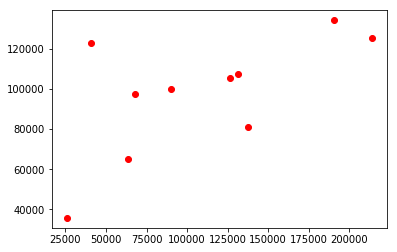

In [25]:
plt.scatter(y_pred,y_test,color="red")